# Лабораторная Работа №7
### Ремизов Дмитрий А-05-20


## Задача 7.1
Найти приближенное решение задачи Коши из таблицы  с точностью $\varepsilon = 10^{-6}$ <br>
### Порядок решения задачи:
1. Найти решение задачи Коши  с фиксированным шагом  $h=0.01$ методом Эйлера и методом индивидуального варианта (задача 6.2).
2. Построить графики полученных  решений задачи. 
3. Найти решение той же задачи с заданной точностью. Построить графики решения и сравнить с п.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.integrate import odeint

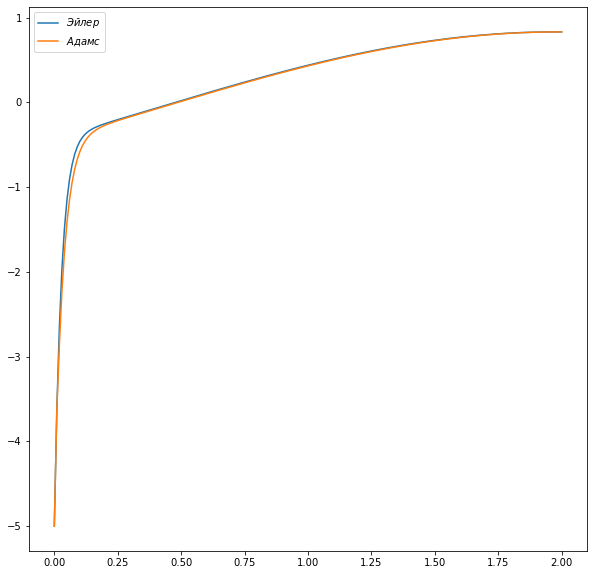

In [2]:
def f(t, y):
    return -30*y - 10*np.cos(t) + 25*np.sin(t)-2

def Euler(t0, T, y0, h, N):
    ti = t0
    yi = y0
    t_mas = []
    y_mas = []
    t_mas.append(ti)
    y_mas.append(yi)
    for i in range(1, N+1): 
        ti += h
        y = yi
        yi = y + h*f(ti, y)
        t_mas.append(ti)
        y_mas.append(yi)
    t_mas = np.array(t_mas)
    y_mas = np.array(y_mas)
    return t_mas, y_mas

def REuler(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Euler(t0, T, y0, h, N)
    th2, yh2 = Euler(t0, T, y0, h/2, N*2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Euler(t0, T, y0, h/2, N*2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("Euler: N = ", N, "h = ", h/2)
    return th2, yh2

def Adams(t0, T, y0, h, N):
    ti_1 = t0
    yi_1 = y0
    ti = ti_1 + h
    yi = yi_1 + h*f(ti_1, yi_1)
    t_mas = np.array([ti_1, ti])
    y_mas = np.array([yi_1, yi])
    for i in range(1, N):
        ti_2 = ti + h
        yi_2 = yi + (h/2)*(3*f(ti, yi) - f(ti_1, yi_1))
        t_mas = np.append(t_mas, [ti_2])
        y_mas = np.append(y_mas, [yi_2])
        ti_1 += h
        ti += h
        yi_1 = yi
        yi = yi_2
    return t_mas, y_mas

def RAdams(t0, T, y0, h, e):
    N = int((T - t0)/h)
    th, yh = Adams(t0, T, y0, h, N)
    th2, yh2 = Adams(t0, T, y0, h/2, N*2)
    rMax = np.abs(yh2[0] - yh[0])
    for i in range(1, N):
        if(np.abs(yh2[2*i] - yh[i]) > rMax):
            rMax = np.abs(yh2[2*i] - yh[i])
    
    while rMax > e:
        h = h/2
        N = N*2
        th = th2
        yh = yh2
        th2, yh2 = Adams(t0, T, y0, h/2, N*2)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("Adams: N = ", N, "h = ", h/2)
    return th2, yh2

t0 = 0
T = 2
y0 = -5
h0 = 0.01

fig, axs = plt.subplots(1,1, figsize = (10, 10))
x, y = Euler(t0, T, y0, h0, int((T-t0)/h0))
axs.plot(x, y, label = '$Эйлер$')
x, y = Adams(t0, T, y0, h0, int((T-t0)/h0))
axs.plot(x, y, label = '$Адамс$')
axs.legend()

Euler: N =  3276800 h =  3.0517578125e-07
Adams: N =  25600 h =  3.90625e-05


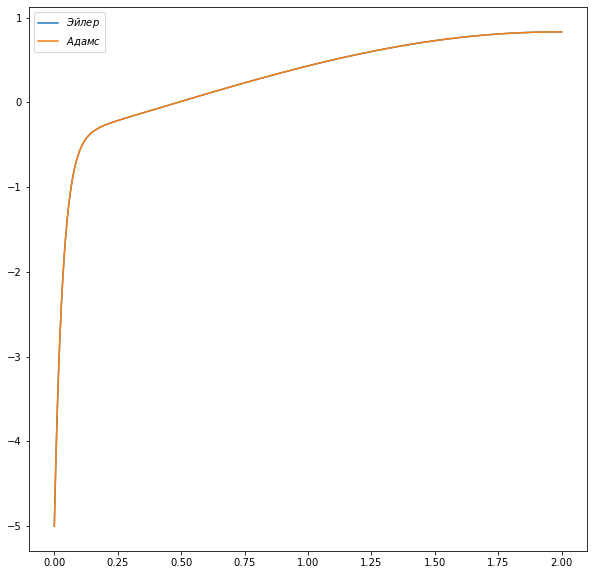

In [3]:
e = 10**(-5)
fig, axs = plt.subplots(1,1, figsize = (10, 10))
x, y = REuler(t0, T, y0, h0, e)
axs.plot(x, y, label = '$Эйлер$')
x, y = RAdams(t0, T, y0, h0, e)
axs.plot(x, y, label = '$Адамс$')
axs.legend()

По графикам можно заметить, что метод Адамса точнее метода Эйлера, но с заданной точностью оба метода решают достаточно точно, но методу Адамса требуется меньше шагов

## Задача 7.2
Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами <br>
$Y'(t) = AY(t)$, $Y(0)=Y_0$ <br>
$Z'(t) = BZ(t)$, $Z(0)=Z_0$, <br> где $A$ и $B$ -- заданные матрицы, $Y_0$, $Z_0$ -- заданные векторы. Исследовать поведение решения систем уравнений. <br>
### Порядок решения задачи:
1. Используя встроенную функцию для нахождения собственных чисел матриц A и B,  найти коэффициенты жесткости обеих систем. Установить какая  задача является жесткой.
2. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера. 
3. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h.
4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом h=0.01. Построить графики компонент полученного решения.
5. Найти решение  жесткой задачи с заданной точностью $\varepsilon = 10^{-6}$. Построить графики  компонент решения и сравнить с п.4.

In [4]:
A = np.array([[-1.485, 2.294, 1.151, 0.302], 
             [-1.794, -1.364, -0.972, -1.375],
             [-1.848, 0.634, -1.764, 2.046],
             [0.212, 0.625, -2.394, -1.386]])

Y = np.array([[8.4, 8.4, 6.4, 8.4]])

B = np.array([[-416.68, -189.54, 278.56, -215.75],
             [-210.12, -514.15, 141.483, 289.476],
             [278.564, 127.55, -194.52, 145.269], 
             [-195.76, 309.468, 131.742, -496.65]])

Z = np.array([[1.2, 5.6, 3.2, 5.6]])

ASobs, vA = LA.eig(A)
Amax = np.amax(abs(ASobs.real))
Amin = np.amin(abs(ASobs.real))

BSobs, vB = LA.eig(B)
Bmax = np.amax(abs(BSobs.real))
Bmin = np.amin(abs(BSobs.real))

print ("Собственные числа матрицы А: \n", ASobs, "\n max = ", Amax , "min = ", Amin)
print ("Коэффициент жесткости А :", Amax/Amin , "\n-------------------------------------------------------------------------\n")
print ("Собственные числа матрицы B: \n", BSobs, "\n max = ", Bmax, "min = ", Bmin)
print ("Коэффициент жесткости B :", Bmax/Bmin)

Собственные числа матрицы А: 
 [-1.99983473+3.00008304j -1.99983473-3.00008304j -0.99966527+2.00029295j
 -0.99966527-2.00029295j] 
 max =  1.9998347349834618 min =  0.999665265016536
Коэффициент жесткости А : 2.0005043737819395 
-------------------------------------------------------------------------

Собственные числа матрицы B: 
 [-804.99982743+19.9995296j -804.99982743-19.9995296j
   -4.99892058 +0.j          -7.00142455 +0.j       ] 
 max =  804.9998274309306 min =  4.9989205847145675
Коэффициент жесткости B : 161.0347301560293


### Задача 2-я система является жесткой

In [5]:
def simple_euler_mult(matrix ,x_i, y_i, h, x_i_1):
    return matrix @ y_i

def SEuler(y0, A, h_result):
    t0 = 0
    T = 1

    A_mult = (np.eye(A.shape[0]) + h_result*A)

    x_result = np.arange(t0, T, h_result)


    y_result=[]
    for i in range(x_result.shape[0]):
        if i==0:
            y_result.append(y0)
        else:
            y_result.append(simple_euler_mult(A_mult, x_result[i-1], y_result[i-1], h_result, x_result[i]))  

    y1 = [x[0] for x in y_result]
    y2 = [x[1] for x in y_result]
    y3 = [x[2] for x in y_result]
    y4 = [x[3] for x in y_result]

    return y1, y2, y3, y4

In [6]:
def F1(s, t):
    dy1dt = -1.485*s[0] + 2.294*s[1] + 1.151*s[2] +0.302*s[3]
    dy2dt = -1.794*s[0] -1.364*s[1] -0.972*s[2] -1.375*s[3]
    dy3dt = -1.848*s[0] + 0.634*s[1] -1.764*s[2] + 2.046*s[3]
    dy4dt = 0.212*s[0] + 0.625*s[1] -2.3941*s[2] -1.386*s[3]
    return [dy1dt, dy2dt, dy3dt, dy4dt]

def F2(s, t):
    dy1dt = -416.68*s[0] -189.54*s[1] +278.56*s[2] -215.75*s[3]
    dy2dt = -210.12*s[0] -514.15*s[1] + 141.483*s[2] + 289.476*s[3]
    dy3dt = 278.564*s[0] + 127.55*s[1] -194.52*s[2] + 145.269*s[3]
    dy4dt = -195.76*s[0] + 309.468*s[1] + 131.742*s[2] - 496.65*s[3]
    return [dy1dt, dy2dt, dy3dt, dy4dt]

Численные решения обеих задач на отрезке $[0, 1]$ с  шагом h = 0.01 явным методом Эйлера. <br>
Синий график -- решение встроенной функцией

#### 1-я система:

In [7]:
y0 = np.array([8.4, 8.4, 6.4, 8.4])
h = 0.01
N = int(1/h)

y1, y2, y3, y4 = SEuler(y0, A, h)

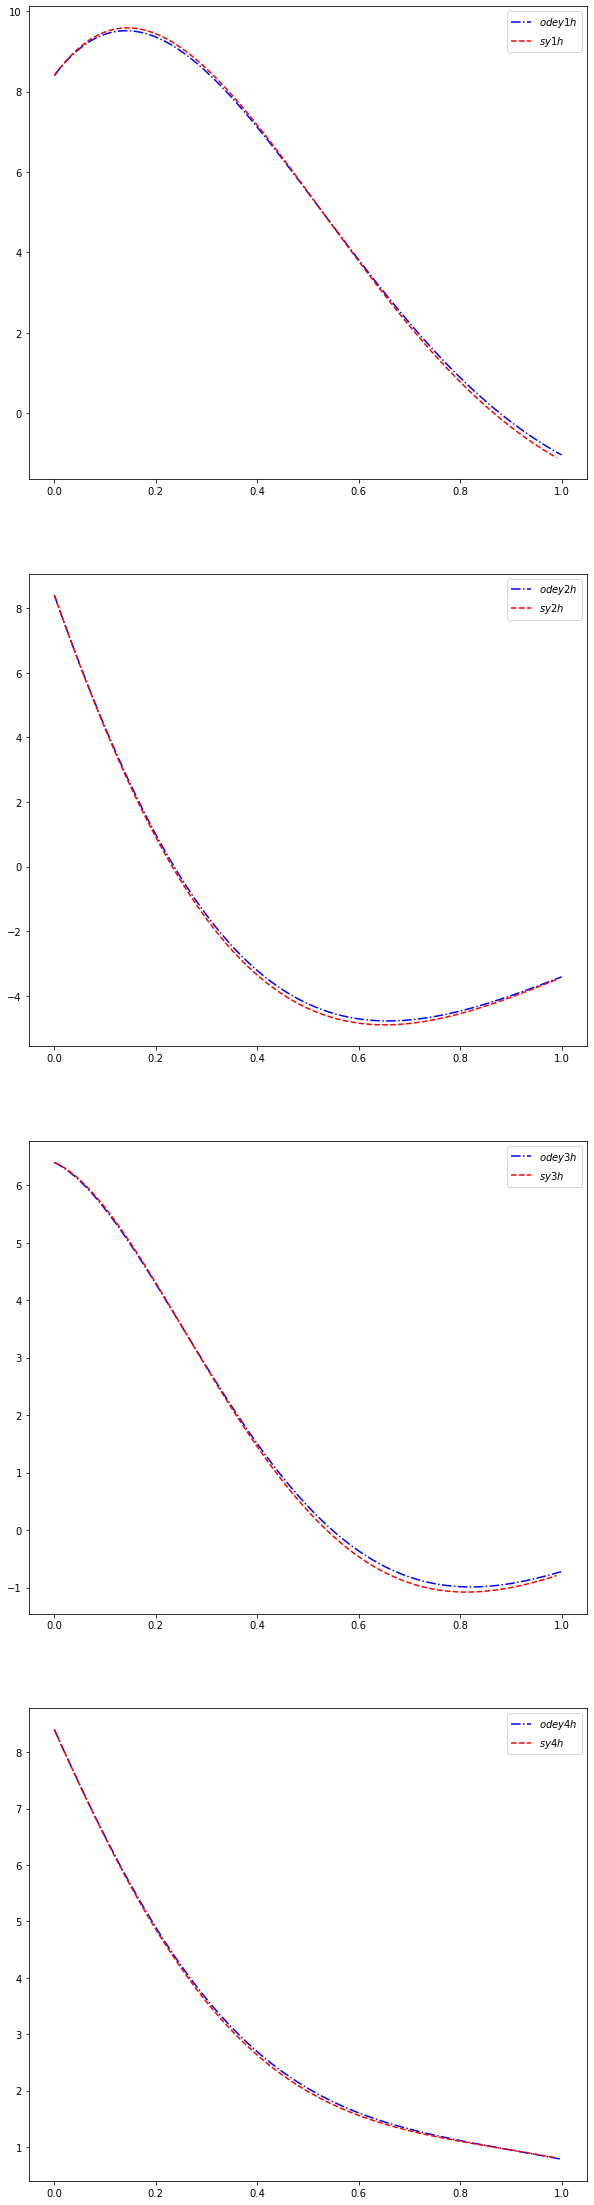

In [8]:
fig, axs = plt.subplots(4,1, figsize = (10, 40))
x_result = np.arange(0, 1, h)

t = np.linspace(0, 1, N+1)
s0 = [8.4, 8.4, 6.4, 8.4]
s = odeint(F1, s0, t)
axs[0].plot(t, s[:, 0], label = '$ode y1h$', color = "blue", ls = '-.')
axs[1].plot(t, s[:, 1], label = '$ode y2h$', color = "blue", ls = '-.')
axs[2].plot(t, s[:, 2], label = '$ode y3h$', color = "blue", ls = '-.')
axs[3].plot(t, s[:, 3], label = '$ode y4h$', color = "blue", ls = '-.')

axs[0].plot(x_result, y1, label = '$s y1h$', color = "red", ls = '--')
axs[1].plot(x_result, y2, label = '$s y2h$', color = "red", ls = '--')
axs[2].plot(x_result, y3, label = '$s y3h$', color = "red", ls = '--')
axs[3].plot(x_result, y4, label = '$s y4h$', color = "red", ls = '--')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

#### 2-я система:

In [9]:
z0 = np.array([1.2, 5.6, 3.2, 5.6])
h = 0.01
N = int(1/h)

z1, z2, z3, z4 = SEuler(z0, B, h)

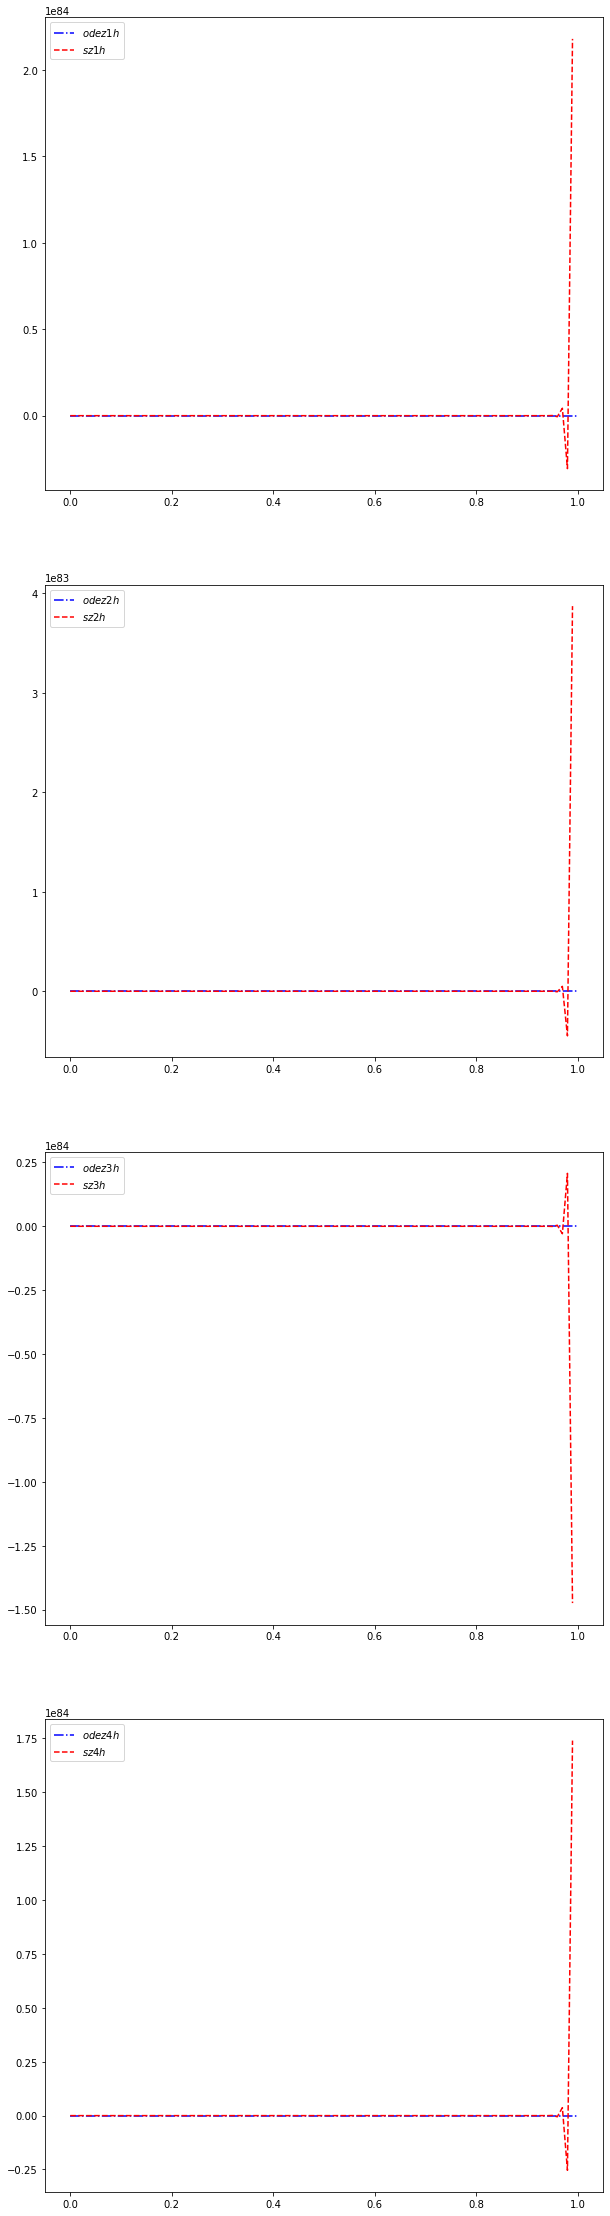

In [10]:
fig, axs = plt.subplots(4,1, figsize = (10, 40))
x_result = np.arange(0, 1, h)

t = np.linspace(0, 1, N+1)
s0 = [1.2, 5.6, 3.2, 5.6]
s = odeint(F2, s0, t)
axs[0].plot(t, s[:, 0], label = '$ode z1h$', color = "blue", ls = '-.')
axs[1].plot(t, s[:, 1], label = '$ode z2h$', color = "blue", ls = '-.')
axs[2].plot(t, s[:, 2], label = '$ode z3h$', color = "blue", ls = '-.')
axs[3].plot(t, s[:, 3], label = '$ode z4h$', color = "blue", ls = '-.')


axs[0].plot(x_result, z1, label = '$s z1h$', color = "red", ls = '--')
axs[1].plot(x_result, z2, label = '$s z2h$', color = "red", ls = '--')
axs[2].plot(x_result, z3, label = '$s z3h$', color = "red", ls = '--')
axs[3].plot(x_result, z4, label = '$s z4h$', color = "red", ls = '--')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

1-я задача хорошо приближена в силу малого числа жесткости. Т.к. 2-я задача жесткая, то решение на конце отрезка этой задачи можно наблюдать раскачивание.

#### Неявный метод Эйлера

In [11]:
def SNEuler(y0, A, h_result):
    t0 = 0
    T = 1

    A_mult = np.linalg.inv((np.eye(A.shape[0]) - h_result*A))

    x_result = np.arange(t0, T, h_result)
    y_result=[]
    for i in range(x_result.shape[0]):
        if i==0:
            y_result.append(y0)
        else:
            y_result.append(simple_euler_mult(A_mult, x_result[i-1], y_result[i-1], h_result, x_result[i]))  
            

    y1 = [x[0] for x in y_result]
    y2 = [x[1] for x in y_result]
    y3 = [x[2] for x in y_result]
    y4 = [x[3] for x in y_result]

    return y1, y2, y3, y4

def SNEuler_acc(y0, A, h_result):
    t0 = 0
    T = 1

    A_mult = np.linalg.inv((np.eye(A.shape[0]) - h_result*A))

    x_result = np.arange(t0, T, h_result)
    y_result=[]
    for i in range(x_result.shape[0]):
        if i==0:
            y_result.append(y0)
        else:
            y_result.append(simple_euler_mult(A_mult, x_result[i-1], y_result[i-1], h_result, x_result[i]))  

    return np.array(y_result)

#### Решаем неявным методом 2-ю систему:

In [12]:
y0 = np.array([1.2, 5.6, 3.2, 5.6])
h = 0.01
N = int(1/h)

y1, y2, y3, y4 = SEuler(y0, B, h)

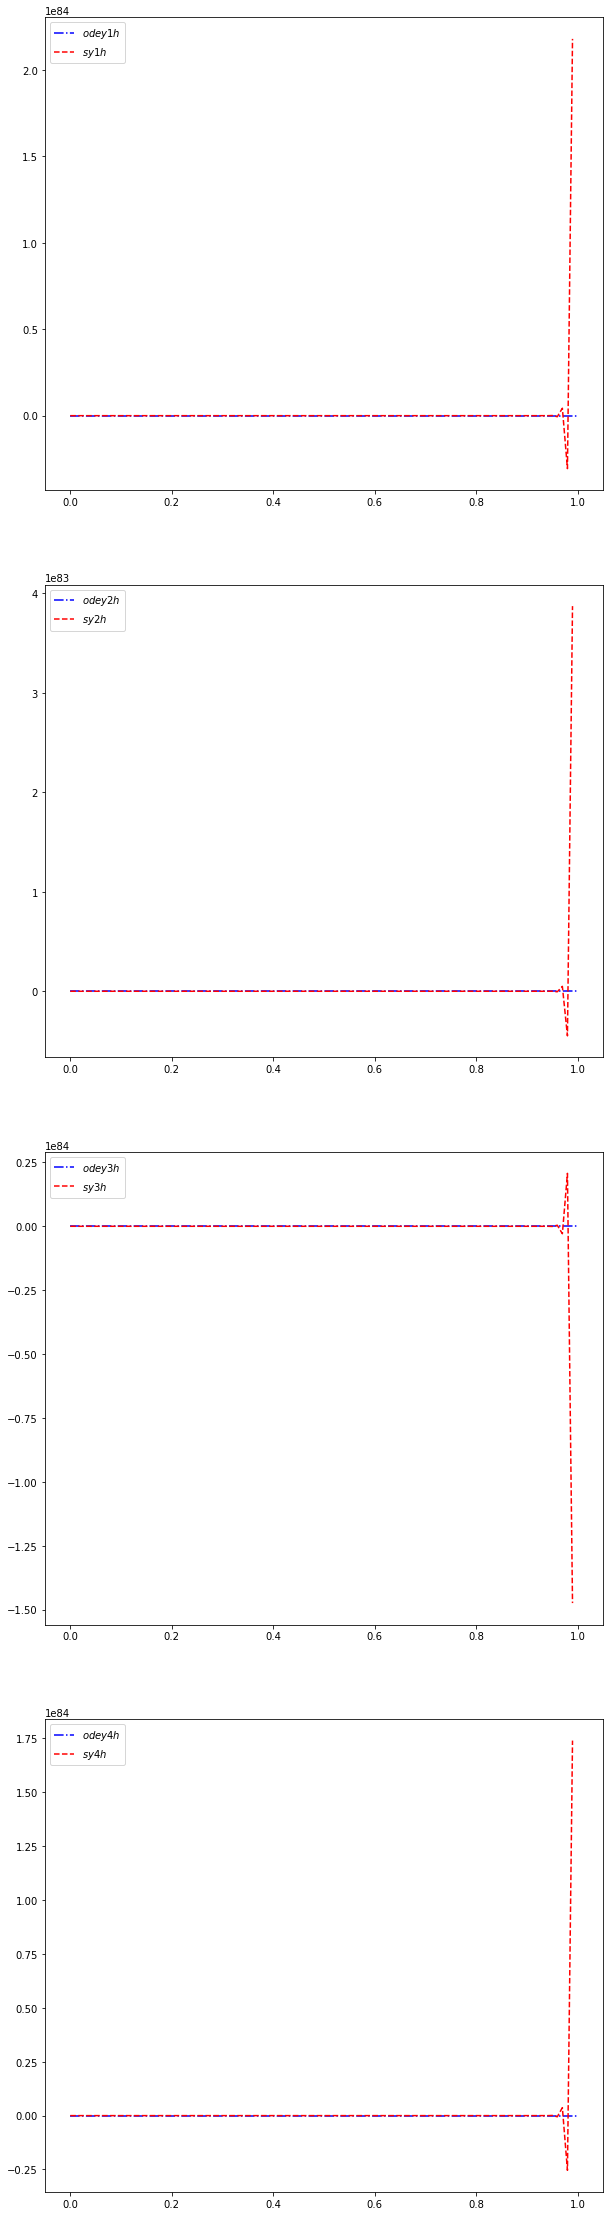

In [13]:
fig, axs = plt.subplots(4,1, figsize = (10, 40))
x_result = np.arange(0, 1, h)

t = np.linspace(0, 1, N+1)
s0 = [1.2, 5.6, 3.2, 5.6]
s = odeint(F2, s0, t)
axs[0].plot(t, s[:, 0], label = '$ode y1h$', color = "blue", ls = '-.')
axs[1].plot(t, s[:, 1], label = '$ode y2h$', color = "blue", ls = '-.')
axs[2].plot(t, s[:, 2], label = '$ode y3h$', color = "blue", ls = '-.')
axs[3].plot(t, s[:, 3], label = '$ode y4h$', color = "blue", ls = '-.')

axs[0].plot(x_result, y1, label = '$s y1h$', color = "red", ls = '--')
axs[1].plot(x_result, y2, label = '$s y2h$', color = "red", ls = '--')
axs[2].plot(x_result, y3, label = '$s y3h$', color = "red", ls = '--')
axs[3].plot(x_result, y4, label = '$s y4h$', color = "red", ls = '--')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

Решение все равно расходится в конце отрезка. решим с заданной точностью

In [14]:
def Solution(e, Yt, A):
    h = 10**(-1)
    
    Yh = np.array(SNEuler_acc(Yt, A, h)).reshape(4, -1)
    Yh2 = np.array(SNEuler_acc(Yt, A, h/2)).reshape(4, -1)
    Yi = Yh
    for i in range(len(Yh)):
        Yi[0, i] = (-Yh[0,i] + Yh2[0, 2*i])/3
        Yi[1, i] = (-Yh[1,i] + Yh2[1, 2*i])/3
        Yi[2, i] = (-Yh[2,i] + Yh2[2, 2*i])/3
        Yi[3, i] = (-Yh[3,i] + Yh2[3, 2*i])/3
    rMax = max([LA.norm(Yi[0]), LA.norm(Yi[1]),
                LA.norm(Yi[2]),LA.norm(Yi[3])])
    rMax = np.abs(rMax)
    
    while (rMax > e) and (h > e):
        h = h/2
        Yh = Yh2
        Yh2 = np.array(SNEuler_acc(Yt, A, h/2)).reshape(4, -1)
        Yi = Yh
        for i in range(len(Yh)):
            Yi[0, i] = (-Yh[0,i] + Yh2[0, 2*i])/3
            Yi[1, i] = (-Yh[1,i] + Yh2[1, 2*i])/3
            Yi[2, i] = (-Yh[2,i] + Yh2[2, 2*i])/3
            Yi[3, i] = (-Yh[3,i] + Yh2[3, 2*i])/3
        rMax = max([LA.norm(Yi[0], ord=2), LA.norm(Yi[1], ord=2),
                    LA.norm(Yi[2], ord=2),LA.norm(Yi[3], ord=2)])
        rMax = np.abs(rMax)
        Yh = np.array(Yh)
        Yh2 = np.array(Yh2) 
    Yh2 = Yh2.reshape(-1, 4)
    
    y1 = [x[0] for x in Yh2]
    y2 = [x[1] for x in Yh2]
    y3 = [x[2] for x in Yh2]
    y4 = [x[3] for x in Yh2]
    
    print("N = ", int(1/(h/2)), " h = ", h/2)
    return y1, y2, y3, y4, int(1/(h/2))

y1, y2, y3, y4, N = Solution(10**(-6), y0, B)

N =  2621440  h =  3.814697265625e-07


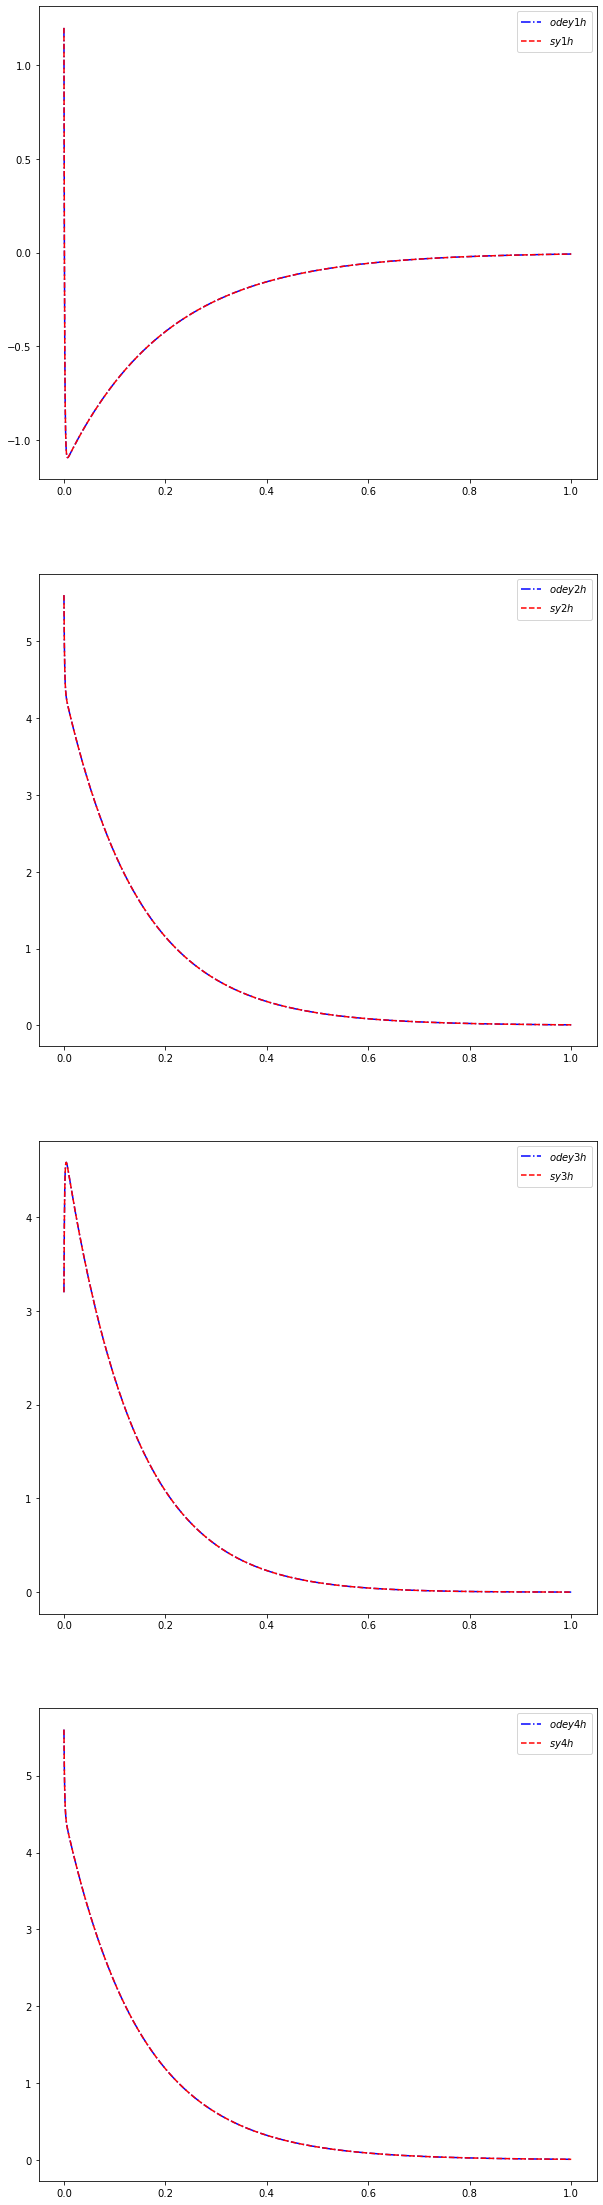

In [15]:
fig, axs = plt.subplots(4,1, figsize = (10, 40))
x_result = np.linspace(0, 1, N)

t = np.linspace(0, 1, N+1)
s0 = [1.2, 5.6, 3.2, 5.6]
s = odeint(F2, s0, t)
axs[0].plot(t, s[:, 0], label = '$ode y1h$', color = "blue", ls = '-.')
axs[1].plot(t, s[:, 1], label = '$ode y2h$', color = "blue", ls = '-.')
axs[2].plot(t, s[:, 2], label = '$ode y3h$', color = "blue", ls = '-.')
axs[3].plot(t, s[:, 3], label = '$ode y4h$', color = "blue", ls = '-.')

axs[0].plot(x_result, y1, label = '$s y1h$', color = "red", ls = '--')
axs[1].plot(x_result, y2, label = '$s y2h$', color = "red", ls = '--')
axs[2].plot(x_result, y3, label = '$s y3h$', color = "red", ls = '--')
axs[3].plot(x_result, y4, label = '$s y4h$', color = "red", ls = '--')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

Для достижения достаточной точности при решении жесткой задачи понадобился довольно маленький шаг